In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")
links = pd.read_csv("links.csv")
tags = pd.read_csv("tags.csv")

In [3]:
tag= (tags.groupby(['userId', 'movieId'])['tag'].apply(lambda x: ', '.join(x)).reset_index())

In [4]:
df = ratings.merge(movies, on='movieId', how='left')
df = df.merge(links, on='movieId', how='left')
df = df.merge(tag, on=['userId', 'movieId'], how='left')
df.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,NaN
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,NaN
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0,NaN
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,NaN
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,NaN


In [5]:
df.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
imdbId           0
tmdbId          13
tag          99201
dtype: int64

In [6]:
df['tag'].isnull().sum()

np.int64(99201)

In [7]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [8]:
df['tag'] = df['tag'].fillna('No Tag')

In [9]:
df.isnull().sum()

userId        0
movieId       0
rating        0
timestamp     0
title         0
genres        0
imdbId        0
tmdbId       13
tag           0
dtype: int64

In [10]:
df.isnull().sum().sum()

np.int64(13)

In [11]:
df.dropna()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,No Tag
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,No Tag
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0,No Tag
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,No Tag
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,No Tag
...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,4972582,381288.0,No Tag
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0,Heroic Bloodshed
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,5052448,419430.0,No Tag
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,No Tag


In [12]:
df['tmdbId'].value_counts()

tmdbId
13.0        329
278.0       317
680.0       307
274.0       279
603.0       278
           ... 
339751.0      1
48300.0       1
63441.0       1
315465.0      1
36693.0       1
Name: count, Length: 9715, dtype: int64

In [13]:
df['tmdbId'].nunique()


9715

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
 6   imdbId     100836 non-null  int64  
 7   tmdbId     100823 non-null  float64
 8   tag        100836 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 6.9+ MB


In [16]:
df.describe()

,userId,movieId,rating,timestamp,imdbId,tmdbId
count,100836.000000,100836.000000,100836.000000,1.008360e+05,1.008360e+05,100823.000000
mean,326.127564,19435.295718,3.501557,1.205946e+09,3.515475e+05,20105.462633
std,182.618491,35530.987199,1.042529,2.162610e+08,6.220602e+05,53274.143620
min,1.000000,1.000000,0.500000,8.281246e+08,4.170000e+02,2.000000
25%,177.000000,1199.000000,3.000000,1.019124e+09,9.968500e+04,712.000000
50%,325.000000,2991.000000,3.500000,1.186087e+09,1.187690e+05,6957.000000
75%,477.000000,8122.000000,4.000000,1.435994e+09,3.149790e+05,11635.000000
max,610.000000,193609.000000,5.000000,1.537799e+09,8.391976e+06,525662.000000


In [17]:
df.shape

(100836, 9)

In [18]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'imdbId',
       'tmdbId', 'tag'],
      dtype='object')

In [19]:
num_cols = df.select_dtypes(include='number')

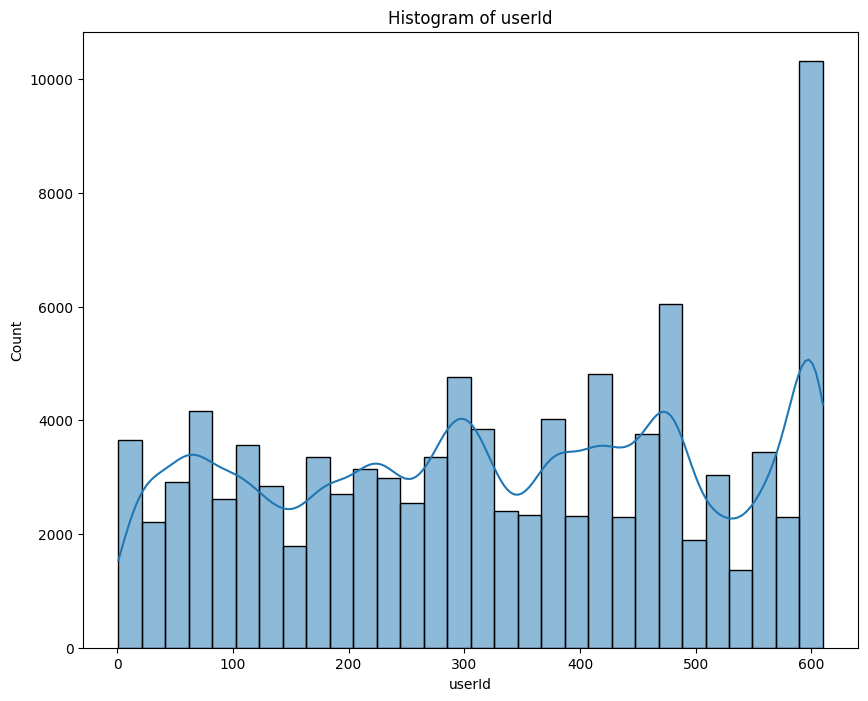

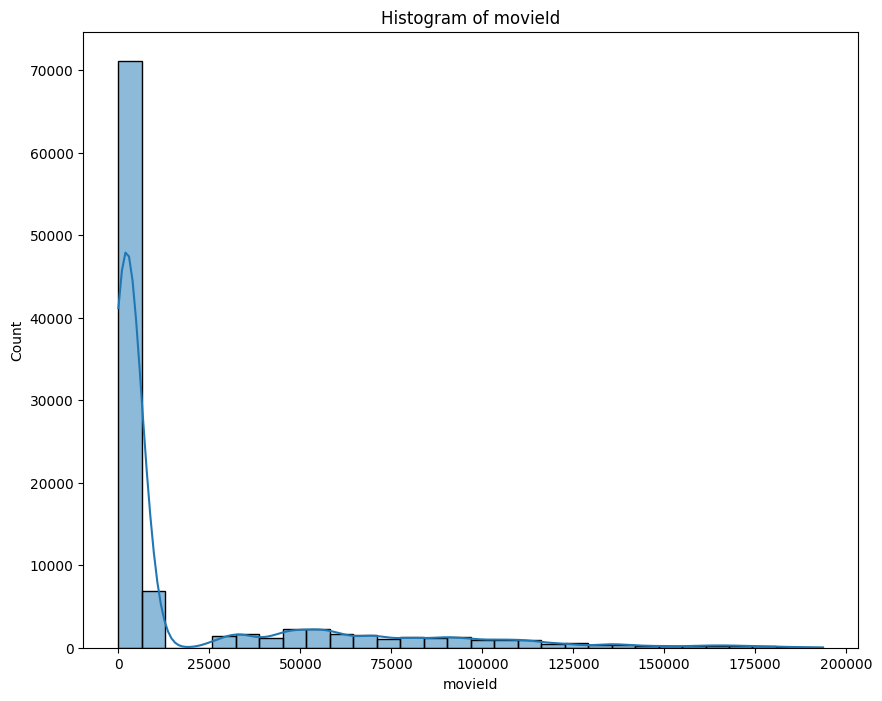

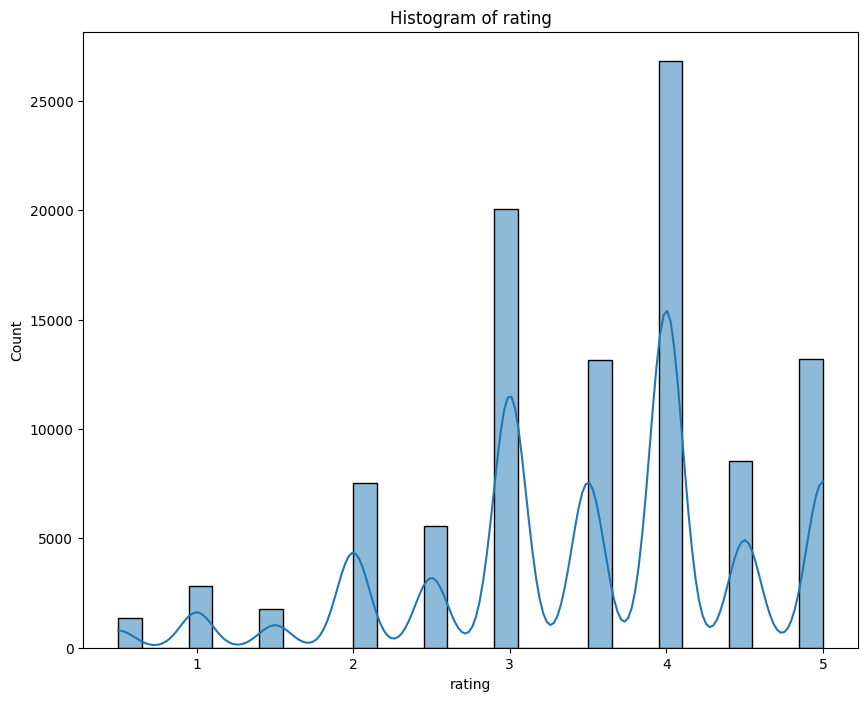

In [ ]:
for i in num_cols:
    plt.figure(figsize=(10,8))
    plt.title(f'Histogram of {i}')
    sns.histplot(df[i],kde=True,bins=30)
    plt.show()

In [ ]:
cat_cols = df.select_dtypes(include='object')
cat_cols

,title,genres,tag
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,No Tag
1,Grumpier Old Men (1995),Comedy|Romance,No Tag
2,Heat (1995),Action|Crime|Thriller,No Tag
3,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,No Tag
4,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,No Tag
...,...,...,...
100831,Split (2017),Drama|Horror|Thriller,No Tag
100832,John Wick: Chapter Two (2017),Action|Crime|Thriller,Heroic Bloodshed
100833,Get Out (2017),Horror,No Tag
100834,Logan (2017),Action|Sci-Fi,No Tag


In [ ]:
df['genres'].value_counts()

genres
Comedy                                             7196
Drama                                              6291
Comedy|Romance                                     3967
Comedy|Drama|Romance                               3000
Comedy|Drama                                       2851
                                                   ... 
Crime|Drama|Film-Noir|Romance                         1
Action|Adventure|Drama|Romance|Thriller|Western       1
Animation|Drama|Sci-Fi|IMAX                           1
Comedy|Fantasy|Mystery|Sci-Fi                         1
Animation|Drama|Romance|Sci-Fi                        1
Name: count, Length: 951, dtype: int64

In [ ]:
df['genres'].value_counts().sum()

np.int64(100836)

In [ ]:
df['tag'].value_counts()

tag
No Tag                                                                                           99201
In Netflix queue                                                                                    42
Disney                                                                                              16
superhero                                                                                           11
religion                                                                                            11
                                                                                                 ...  
atmospheric, beautiful, cinematography, dark, dreamlike, existentialism, moody, philosophical        1
allegorical, uncomfortable, unsettling                                                               1
atmospheric, dreamlike                                                                               1
bad music                                                            

In [ ]:
df['tag'].value_counts().sum()

np.int64(100836)

In [ ]:
df['title'].value_counts()

title
Forrest Gump (1994)                         329
Shawshank Redemption, The (1994)            317
Pulp Fiction (1994)                         307
Silence of the Lambs, The (1991)            279
Matrix, The (1999)                          278
                                           ... 
The Witch (2015)                              1
Goodnight Mommy (Ich seh ich seh) (2014)      1
Exte: Hair Extensions (2007)                  1
Tokyo Tribe (2014)                            1
The Gallows (2015)                            1
Name: count, Length: 9719, dtype: int64

In [ ]:
df['title'].value_counts().sum()

np.int64(100836)

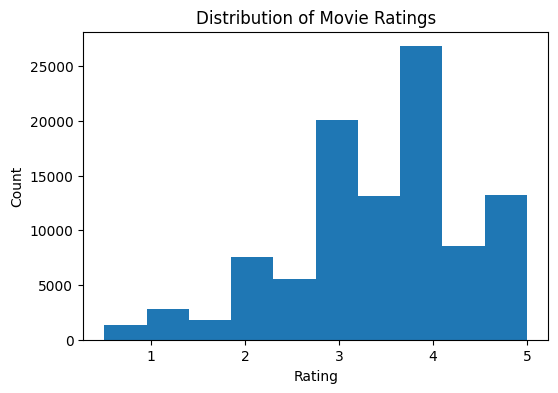

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()

In [ ]:
ratings_per_userId = df.groupby('userId')['movieId'].count()

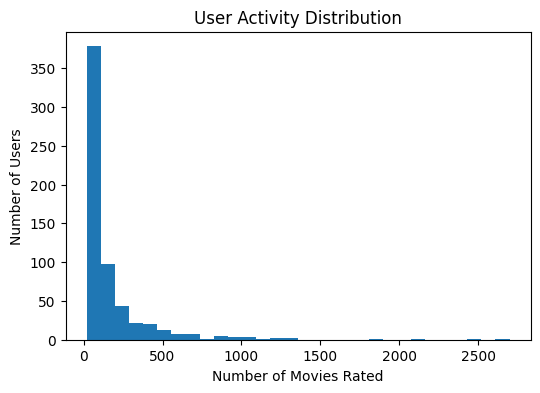

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(ratings_per_userId, bins=30)
plt.xlabel('Number of Movies Rated')
plt.ylabel('Number of Users')
plt.title('User Activity Distribution')
plt.show()


In [ ]:
movie_stats = df.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
)


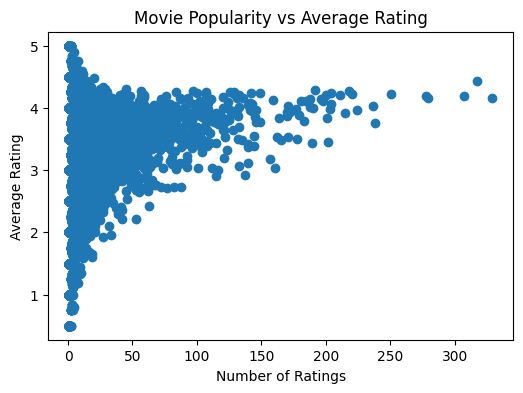

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(movie_stats['rating_count'], movie_stats['avg_rating'])
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('Movie Popularity vs Average Rating')
plt.show()


In [ ]:
user_stats = df.groupby('userId').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
)

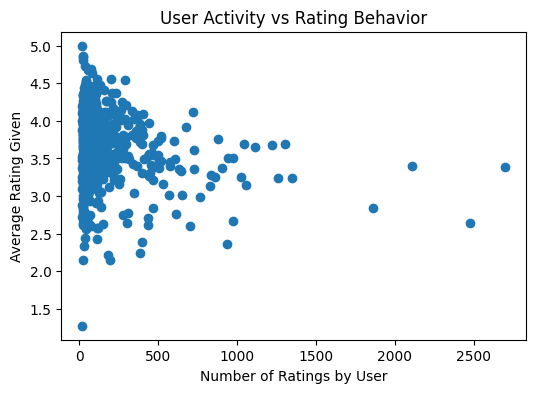

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(user_stats['rating_count'], user_stats['avg_rating'])
plt.xlabel('Number of Ratings by User')
plt.ylabel('Average Rating Given')
plt.title('User Activity vs Rating Behavior')
plt.show()


In [ ]:
ratings_per_movie = df.groupby('movieId')['rating'].count()

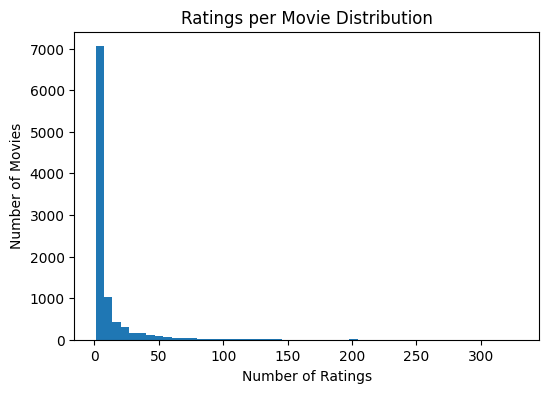

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(ratings_per_movie, bins=50)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.title('Ratings per Movie Distribution')
plt.show()


In [ ]:
corelation = df.corr(numeric_only=True)
corelation

,userId,movieId,rating,timestamp,imdbId,tmdbId
userId,1.000000,0.006773,-0.049348,0.097151,-0.001195,0.004867
movieId,0.006773,1.000000,-0.004061,0.503669,0.859145,0.742098
rating,-0.049348,-0.004061,1.000000,-0.005802,-0.007806,-0.023532
timestamp,0.097151,0.503669,-0.005802,1.000000,0.411790,0.291673
imdbId,-0.001195,0.859145,-0.007806,0.411790,1.000000,0.833295
tmdbId,0.004867,0.742098,-0.023532,0.291673,0.833295,1.000000


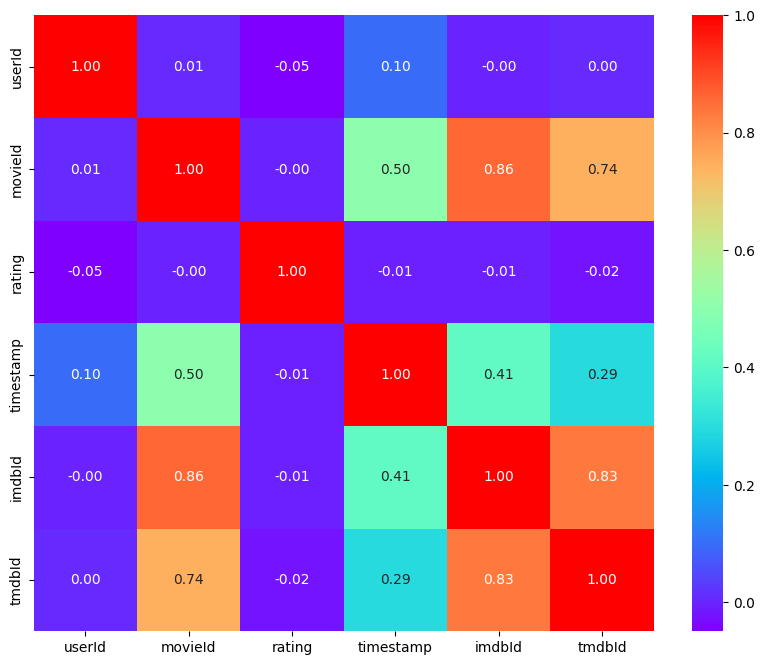

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corelation,fmt='.2f',annot=True,cmap='rainbow')
plt.show()

In [ ]:
g = df.copy()
g['genres'] = g['genres'].str.split('|')
g = g.explode('genres')
avg = g.groupby('genres')['rating'].mean().sort_values(ascending=False)

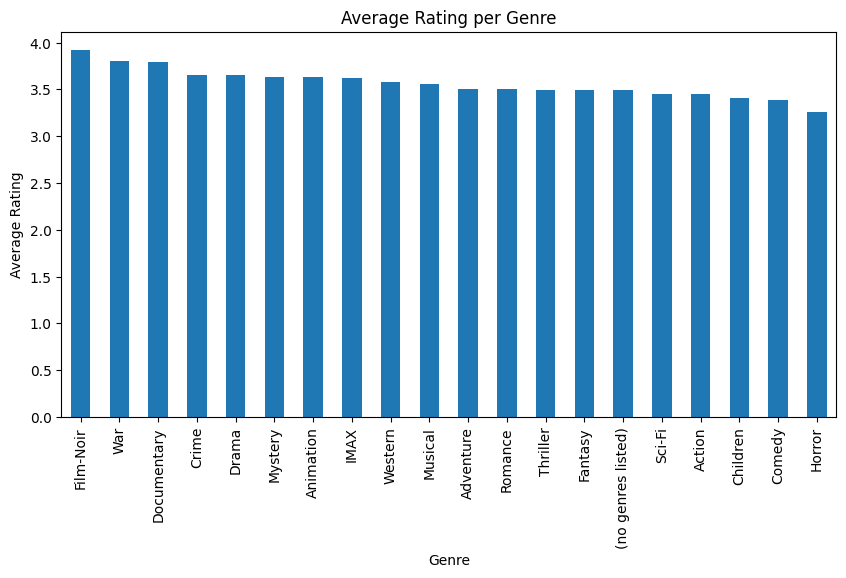

In [ ]:
avg.plot(kind='bar', figsize=(10,5))
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

In [ ]:
num_cols = df.select_dtypes(include='number').columns.tolist()
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)

IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

df_clean = df[~((df[num_cols] < lower) | (df[num_cols] > upper)).any(axis=1)]

### 1 Basic Problem Understanding
Nowadays many movies are present on online platforms Because of this users feel confuse in selecting movie  
As a second year student I try to understand how movie suggestion can be done using data  
Main idea of this project is to see how user past ratings can help in movie suggestion

This project is more about learning than perfect result

---

### 2 Initial Thinking
At starting I do not know exact method of recommendation  
So first idea is to explore dataset and understand what data is given  
I try to see how users rate movies and how many movies are there

This gives basic understanding of problem

---

### 3 Data Understanding Direction
Before applying any logic data must be understood properly

In this project I focus on
- Checking what columns are available
- Seeing missing values
- Understanding relation between users and movies
- Combining rating and movie data

This helps me to move step by step

---

### 4 Observation Direction
I try to observe data using simple analysis

- How ratings are distributed
- Which movies are rated more
- Which users are more active

From this observation I get basic idea about data behaviour

---

### 5 Recommendation Idea
Instead of jumping to solution I think about how humans recommend movies

If two users like similar movies then maybe their choice is similar  
If many users rate two movies in same way then movies can be related  

This idea leads towards collaborative filtering concept

---

### 6 Similarity Concept
As a beginner I understand similarity as closeness not exact match

Users or movies having similar rating pattern can be considered similar  
This helps in grouping users or movies

---

### 7 Suggestion Direction
After getting some similarity idea I move towards suggestion

The direction is
- Use movies liked by user
- Avoid movies already seen
- Suggest few movies only

This is basic level recommendation idea

---

### 8 Learning Based Evaluation
As a beginner I do not focus much on metrics  
I try to see whether suggested movies make sense or not


